<a href="https://colab.research.google.com/drive/1LZ8HY1Y5HH0OSqmpHUkSzRE7HTzeMxQo" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 3, Parts F-H: Stochastic Gradient Descent with a Larger Dataset

Use this notebook to write your code for problem 3 parts F-H by filling in the sections marked `# TODO` and running all cells.

In [1]:
import requests

_id_dict = {
    'sgd_data.csv': '14UPDlsLd9sn0aVOCjslCgyB3AtQoYvnZ',
}

def download_from_gdrive(file_path):
    file_id = _id_dict[file_path]

    URL = "https://docs.google.com/uc?export=download&confirm=1"

    session = requests.Session()

    response = session.get(URL, params={"id": file_id}, stream=True)
    token = get_confirm_token(response)

    if token:
        params = {"id": file_id, "confirm": token}
        response = session.get(URL, params=params, stream=True)
    save_content(response, file_path)


def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith("download_warning"):
            return value
    return None


def save_content(response, destination):
    with open(destination, "wb") as f:
        for chunk in response.iter_content(1024* 1024 * 100):
            if chunk:
                f.write(chunk)

In [2]:
# Setup.

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Problem 3F: Perform SGD with the new dataset

For the functions below, you may re-use your code from parts 3C-E. Note that you can now modify your SGD function to return the final weight vector instead of the weights after every epoch.

In [3]:
def loss(X, Y, w):
    '''
    Calculate the squared loss function.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.

    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''

    loss = np.sum((Y - np.dot(X, w))**2)
    return loss

def gradient(x, y, w):
    '''
    Calculate the gradient of the loss function with respect to
    a single point (x, y), and using weight vector w.

    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.

    Output:
        The gradient of the loss with respect to x, y, and w.
    '''
    gradient = -2 * (y - np.dot(w, x)) * x
    return gradient

def SGD(X, Y, w_start, eta, N_epochs):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.

    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''
    losses = np.zeros(shape = (N_epochs, ))
    w_change = w_start

    for epoch in range(0, N_epochs):
      shuffled_indices = np.random.permutation(range(len(X)))
      for i in shuffled_indices:
        grad = gradient(X[i], Y[i], w_change)
        w_change -= eta * grad
      losses[epoch] = loss(X, Y, w_change)
    return w_change, losses

Next, we need to load the dataset. In doing so, the following function may be helpful:

In [4]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.

    Inputs:
        filename: GeneratorExitiven as a string.

    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

Now, load the dataset in `sgd_data.csv` and run SGD using the given parameters; print out the final weights.

In [5]:
download_from_gdrive('sgd_data.csv')

In [6]:
#==============================================
# TODO:
# (1) load the dataset
# (2) run SGD using the given parameters
# (3) print out the final weights.
#==============================================


# The following should help you get started:

data = load_data('sgd_data.csv')

X = data[:,:-1]
Y = data[:,-1]

modified_data_x = np.column_stack((np.ones(X.shape[0]), X))
modified_data_y = Y

w_start = [.001, .001, .001, .001, .001]

w_c, losses = SGD(modified_data_x, modified_data_y, w_start, np.exp(-15), 800)

print("Final weights: {:}".format(w_c))




Final weights: [ -0.22717902  -5.94211629   3.94389712 -11.7238465    8.78567411]


## Problem 3G: Convergence of SGD

This problem examines the convergence of SGD for different learning rates. Please implement your code in the cell below:

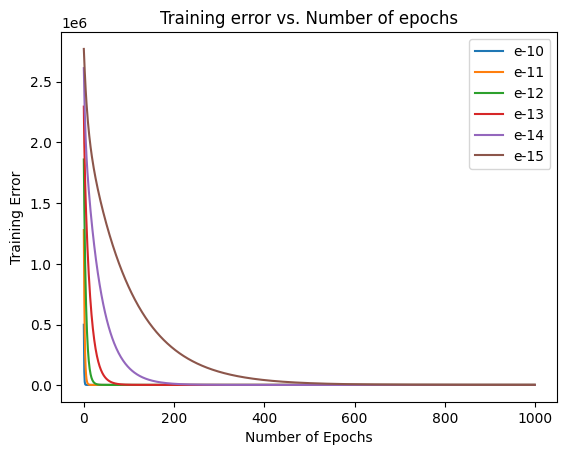

In [7]:
#==============================================
# TODO: create a plot showing the convergence
# of SGD for the different learning rates.
#==============================================

eta_vals = [np.exp(-10), np.exp(-11), np.exp(-12), np.exp(-13), np.exp(-14), np.exp(-15)]

w_start = [0.001, 0.001, 0.001, 0.001, 0.001]
N_epochs = 1000

for eta_val in eta_vals:
  weights_all, losses = SGD(modified_data_x, modified_data_y, w_start, eta_val, N_epochs)

  plt.plot(range(N_epochs), losses)

plt.legend(["e-10", "e-11", "e-12", "e-13", "e-14", "e-15"], loc = "best")
plt.xlabel('Number of Epochs')
plt.ylabel('Training Error')
plt.title('Training error vs. Number of epochs')

plt.show()

## Problem 3H

Provide your code for computing the least-squares analytical solution below.

In [8]:
#==============================================
# TODO: implement the least-squares
# analytical solution.
#==============================================

coefficients = np.linalg.lstsq(modified_data_x, modified_data_y, rcond=None)[0]

print(coefficients)


[ -0.31644251  -5.99157048   4.01509955 -11.93325972   8.99061096]
